In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# custom visuals for this lesson
# import viz_kmeans

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans

## Clustering with the Iris Dataset
- Using this lesson as a guide, perform clustering on the iris dataset.

1. Choose features other than the ones used in the lesson.
2. Visualize the results of your clustering.
3. Use the elbow method to visually select a good value for k.
4. Repeat the clustering, this time with 3 different features.

In [2]:
from pydataset import data

# import data
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# rename columns

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
# define independent variables for k-means

X = iris[['sepal_width', 'petal_width']]
X.head()

,sepal_width,petal_width
1,3.5,0.2
2,3.0,0.2
3,3.2,0.2
4,3.1,0.2
5,3.6,0.2


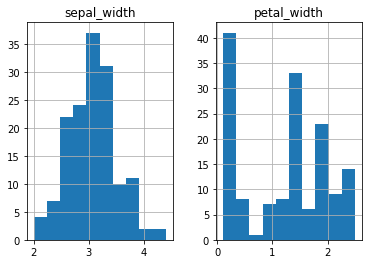

In [5]:
# look at distribution of sepal length and petal_length

X.hist();

### 2) Visualize the results of your clustering.

In [6]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [7]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1], dtype=int32)

In [8]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

<AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>

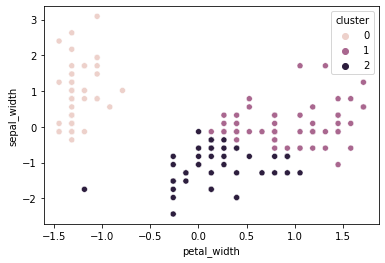

In [9]:
sns.scatterplot(x='petal_width', y='sepal_width', data = X_scaled, hue = 'cluster')

### 3) Use the elbow method to visually select a good value for k.

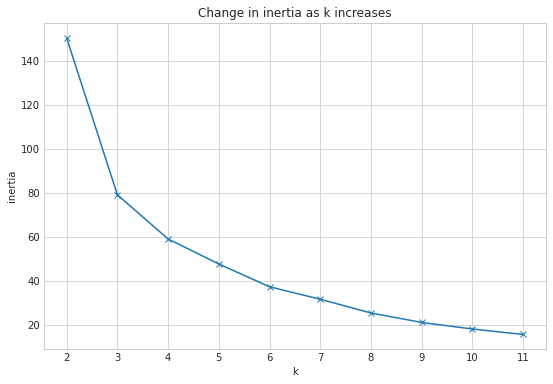

In [10]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### Using the elbow method, k of 3 seems best

### 4) Repeat the clustering, this time with 3 different features.

In [11]:
from pydataset import data

# import data
iris = data('iris')

In [12]:
# rename columns

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

In [13]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [14]:
# define independent variables for k-means

X = iris[['sepal_width', 'petal_width', 'sepal_length', 'petal_length']]

In [15]:
X.head()

,sepal_width,petal_width,sepal_length,petal_length
1,3.5,0.2,5.1,1.4
2,3.0,0.2,4.9,1.4
3,3.2,0.2,4.7,1.3
4,3.1,0.2,4.6,1.5
5,3.6,0.2,5.0,1.4


In [16]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [17]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [18]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

<AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>

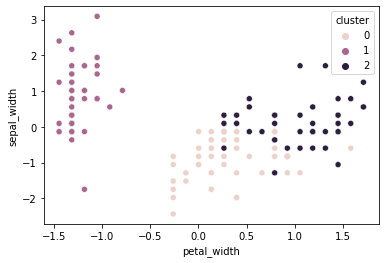

In [19]:
sns.scatterplot(x='petal_width', y='sepal_width', data = X_scaled, hue = 'cluster')

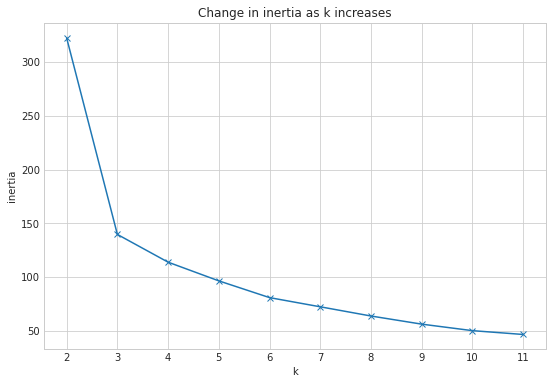

In [20]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

# 2) Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [21]:
# import env file for hostname, username, password, and db_name
from env import host, user, password

# Pass env file authentication to container 'url'
url = f'mysql+pymysql://{user}:{password}@{host}/mall_customers'

    # define sql search for all records from all tables in Zillow database
sql = """
SELECT *
FROM customers
"""

In [22]:
df = pd.read_sql(sql,url)

In [23]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
df.value_counts()

customer_id  gender  age  annual_income  spending_score
1            Male    19   15             39                1
138          Male    32   73             73                1
128          Male    40   71             95                1
129          Male    59   71             11                1
130          Male    38   71             75                1
                                                          ..
70           Female  32   48             47                1
71           Male    70   49             55                1
72           Female  47   49             42                1
73           Female  60   50             49                1
200          Male    30   137            83                1
Length: 200, dtype: int64

In [25]:
# define independent variables for k-means

X = df[['age','annual_income']]
X.head()

,age,annual_income
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'annual_income'}>]], dtype=object)

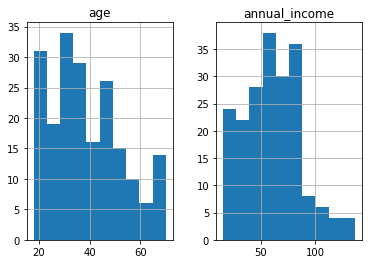

In [26]:
X.hist()

In [27]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [28]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [29]:
# make a new column names cluster in iris and X_scaled dataframe

df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

<AxesSubplot:xlabel='age', ylabel='annual_income'>

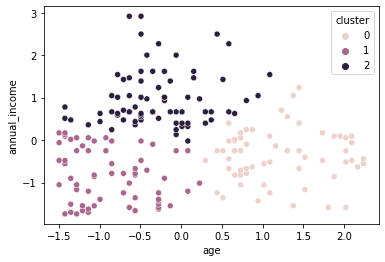

In [30]:
sns.scatterplot(x='age', y='annual_income', data = X_scaled, hue = 'cluster')

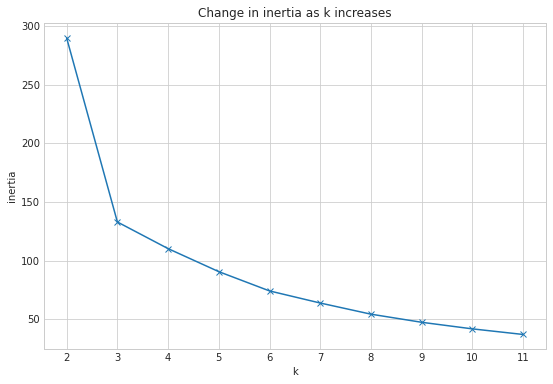

In [31]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [32]:
df.head()

,customer_id,gender,age,annual_income,spending_score,cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [33]:
X2 = df[['age', 'annual_income']]

In [34]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X2)

# Use (predict using) the thing 
kmeans.predict(X2)

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [35]:
# make a new column names cluster in iris and X_scaled dataframe

df['cluster_2'] = kmeans.predict(X2)

df.head()

,customer_id,gender,age,annual_income,spending_score,cluster,cluster_2
0,1,Male,19,15,39,1,1
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,1,1
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,1,1


<AxesSubplot:xlabel='age', ylabel='annual_income'>

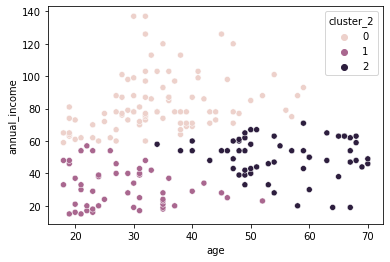

In [36]:
sns.scatterplot(x='age', y='annual_income', data = df, hue = 'cluster_2')

<AxesSubplot:xlabel='age', ylabel='annual_income'>

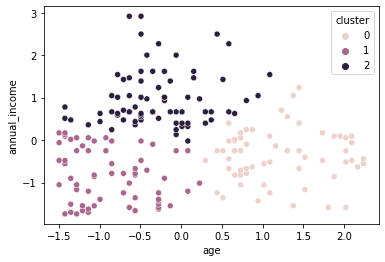

In [37]:
sns.scatterplot(x='age', y='annual_income', data = X_scaled, hue = 'cluster')

In [38]:
clusters = df[['cluster', 'cluster_2']]

array([[<AxesSubplot:title={'center':'cluster'}>,
        <AxesSubplot:title={'center':'cluster_2'}>]], dtype=object)

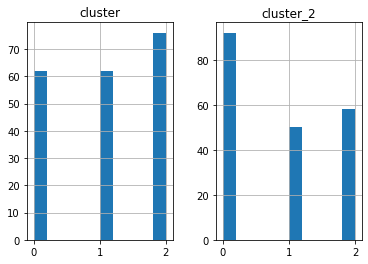

In [39]:
clusters.hist()

### unscaled clusters differ by 30, scaled clusters differ by 15

In [40]:
df.head()

,customer_id,gender,age,annual_income,spending_score,cluster,cluster_2
0,1,Male,19,15,39,1,1
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,1,1
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,1,1


In [41]:
df['is_male'] = df.gender.map({'Male':1,'Female':0})
df.head()

,customer_id,gender,age,annual_income,spending_score,cluster,cluster_2,is_male
0,1,Male,19,15,39,1,1,1
1,2,Male,21,15,81,1,1,1
2,3,Female,20,16,6,1,1,0
3,4,Female,23,16,77,1,1,0
4,5,Female,31,17,40,1,1,0


In [42]:
# select features
X3 = df[['age', 'annual_income','is_male']]

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X3)

# Use (predict using) the thing 
kmeans.predict(X3)

# make a new column names cluster in iris and X_scaled dataframe
df['cluster_3'] = kmeans.predict(X3)

df.head()

,customer_id,gender,age,annual_income,spending_score,cluster,cluster_2,is_male,cluster_3
0,1,Male,19,15,39,1,1,1,1
1,2,Male,21,15,81,1,1,1,1
2,3,Female,20,16,6,1,1,0,1
3,4,Female,23,16,77,1,1,0,1
4,5,Female,31,17,40,1,1,0,1


<AxesSubplot:xlabel='age', ylabel='annual_income'>

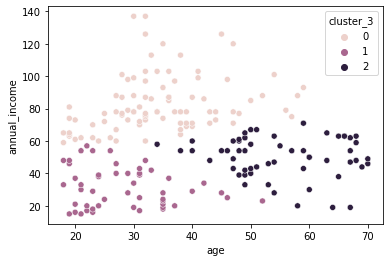

In [43]:
sns.scatterplot(x='age', y='annual_income', data = df, hue = 'cluster_3')

<AxesSubplot:xlabel='age', ylabel='annual_income'>

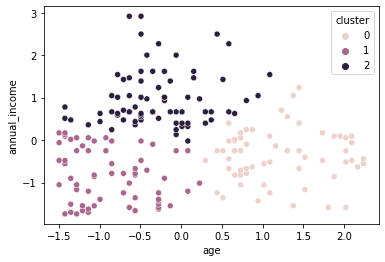

In [44]:
sns.scatterplot(x='age', y='annual_income', data = X_scaled, hue = 'cluster')

## Bonus
- Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
- Visualize the data and guess the number and shape of the clusters.
- Implement the KMeans algorithm on unscaled data and visualize the clusters.
- Repeat the step above but with scaled data. 
- Write down the takeaways from this exercise.

In [45]:
url = 'https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit#gid=0'

In [46]:
url = url.replace('/edit#gid=', '/export?format=csv&gid=')
url

'https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/export?format=csv&gid=0'

In [47]:
df = pd.read_csv(url)

In [48]:
df.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

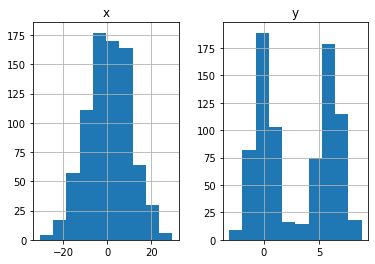

In [49]:
df.hist()

In [50]:
X = df.copy()

In [51]:
X.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


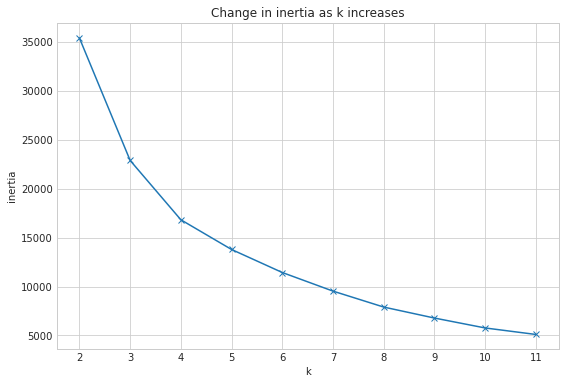

In [52]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

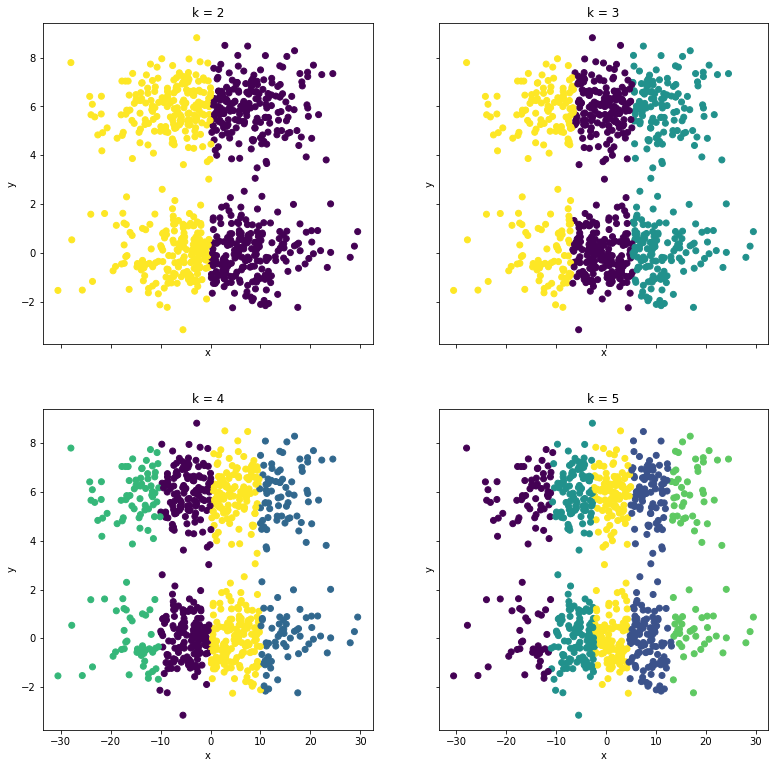

In [53]:
# What value of k is appropriate?

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.x, X.y, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='x', ylabel='y')

In [55]:
#define the thing
kmeans = KMeans(n_clusters=2, random_state = 123)

# fit the thing
kmeans.fit(X)

# Use (predict using) the thing 
kmeans.predict(X)

# make a new column names cluster in iris and X_scaled dataframe
df['cluster'] = kmeans.predict(X)

df.head()

,x,y,cluster
0,-3.641747,0.121540,1
1,-7.620447,1.810897,1
2,-6.505373,0.068072,1
3,7.730963,0.585521,0
4,17.283668,0.344804,0


In [56]:
X.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


<AxesSubplot:xlabel='x', ylabel='y'>

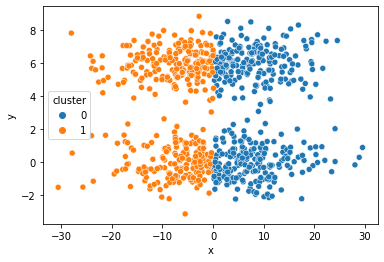

In [57]:
sns.scatterplot(x='x', y='y', data = df, hue = 'cluster')

In [58]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [59]:
#define the thing
kmeans = KMeans(n_clusters=2, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

# make a new column names cluster in iris and X_scaled dataframe
X_scaled['cluster'] = kmeans.predict(X_scaled)

In [60]:
X_scaled

,x,y,cluster
0,-0.419211,-0.904027,1
1,-0.821099,-0.368472,1
2,-0.708466,-0.920978,1
3,0.729546,-0.756937,1
4,1.694464,-0.833249,1
...,...,...,...
795,0.346758,0.898557,0
796,0.560471,0.962863,0
797,0.794464,0.528883,0
798,-0.259313,0.983996,0


<AxesSubplot:xlabel='x', ylabel='y'>

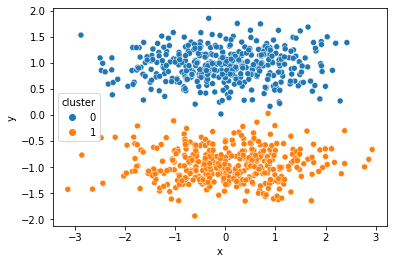

In [61]:
sns.scatterplot(x='x', y='y', data = X_scaled, hue = 'cluster')

In [62]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,x,y
0,-0.040741,0.951092
1,0.040741,-0.951092


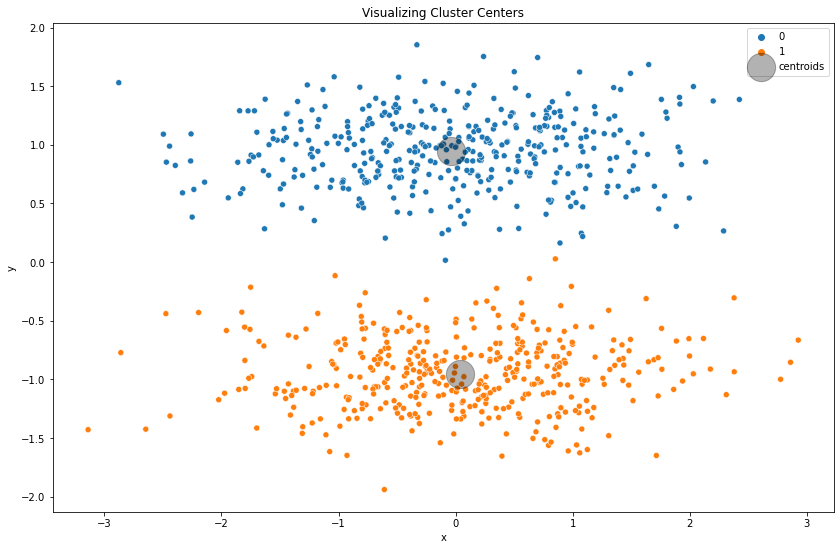

In [63]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'x', y ='y', data = X_scaled, hue = 'cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'x', y = 'y',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();